# Using SEP on a test image 

In [27]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse

%matplotlib inline
rcParams["figure.figsize"] = [10.,8.]

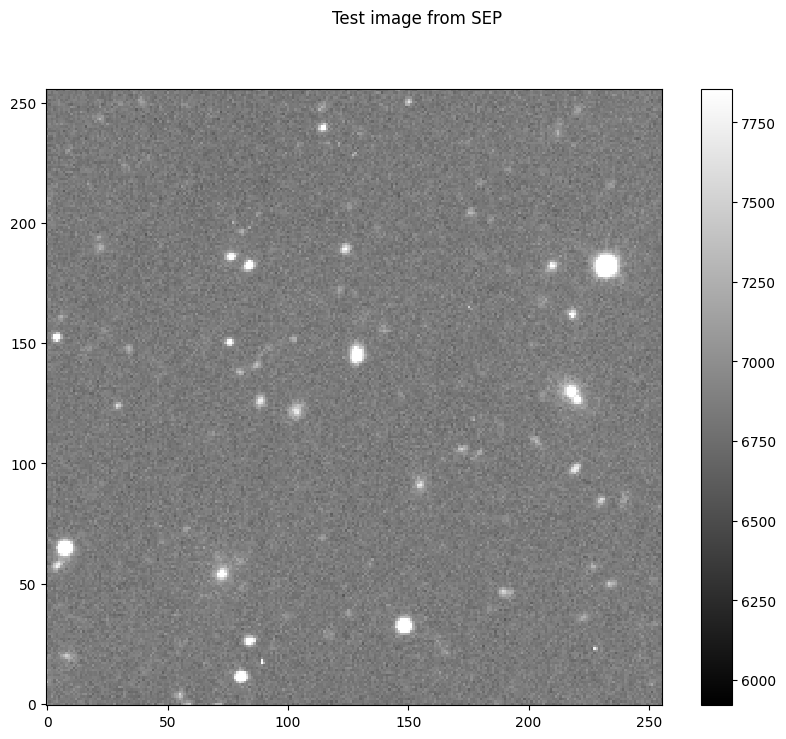

In [28]:
img = fits.getdata("../data/image.fits") #rename file b4 moving on
img = img.astype(img.dtype.newbyteorder('='))

mid, spread = np.mean(img), np.std(img)

fig, ax = plt.subplots()
show = ax.imshow(
    img,
    interpolation = "nearest",
    cmap = "gray",
    vmin = mid - spread,
    vmax = mid + spread,
    origin = "lower",
)

fig.colorbar(show,ax=ax)
fig.suptitle("Test image from SEP")
fig.savefig("../figs/tut.img.png", dpi=150,bbox_inches="tight")
plt.show()

# Just the raw image, with a basics stretch

In [29]:
backg = sep.Background(img)

print("back level:", backg.globalback)
print("back rms:", backg.globalrms)

back level: 6852.04931640625
back rms: 65.46174621582031


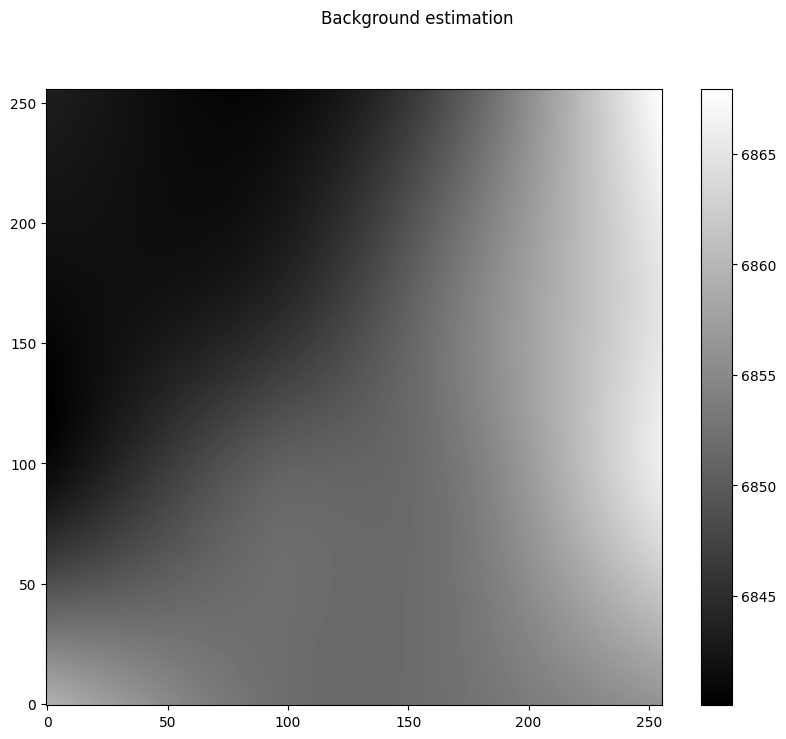

In [30]:
backg_map = backg.back()

fig, ax = plt.subplots()
show = ax.imshow(backg_map , interpolation="nearest",cmap="gray",origin="lower")
fig.colorbar(show, ax=ax)
fig.suptitle("Background estimation")
fig.savefig("../figs/tut_bg.png", dpi=150, bbox_inches="tight")

In [31]:
img_sub = img - backg

In [32]:
# now sep is estimating the background and subjecting it off so we'll use img_sub for finding the sources and fluxes

In [33]:
sources = sep.extract(img_sub, 1.5, err=backg.globalrms)
len(sources)

69

In [34]:
# nice

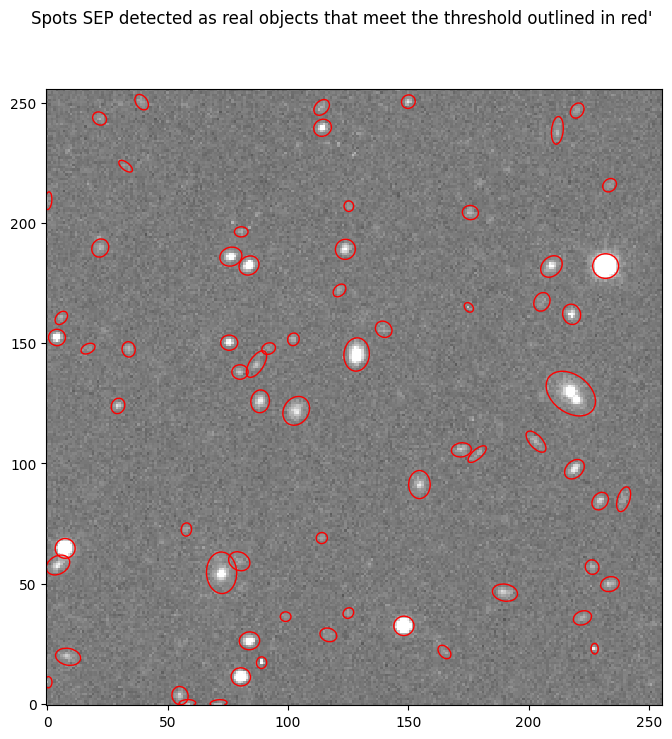

In [35]:
fig, ax = plt.subplots()
mid_sub, spread_sub = np.mean(img_sub), np.std(img_sub)

show = ax.imshow(
    img_sub,
    interpolation="nearest",
    cmap="gray",
    vmin = mid_sub - spread_sub,
    vmax = mid_sub + spread_sub,
    origin="lower",
)

for i in range(len(sources)):
    e = Ellipse(
        xy = (sources["x"][i], sources["y"][i]),
        width = 6 * sources["a"][i],
        height = 6 * sources["b"][i],
        angle = sources["theta"][i] * 180.0 / np.pi,
    )
    e.set_facecolor('none')
    e.set_edgecolor("red")
    ax.add_artist(e)

fig.suptitle("Spots SEP detected as real objects that meet the threshold outlined in red'")
fig.savefig("../figs/tut_sources.png", dpi=150, bbox_inches = "tight")
plt.show()

In [36]:
ap_flux, ap_err, ap_flag = sep.sum_circle(
    img_sub,
    sources["x"],
    sources["y"],
    3.0,
    err=backg.globalrms,
    gain=1.0,
)

list(zip(ap_flux[:10], ap_err[:10], ap_flag[:10]))

[(np.float64(2249.1592968749997),
  np.float64(291.02780177544895),
  np.int16(16)),
 (np.float64(3092.2204296874993), np.float64(291.5922044755955), np.int16(16)),
 (np.float64(5949.8683789062525), np.float64(356.562003313633), np.int16(0)),
 (np.float64(1851.42658203125), np.float64(295.02881628987745), np.int16(16)),
 (np.float64(72736.38691406252), np.float64(440.17220622480534), np.int16(0)),
 (np.float64(3860.7561523437503), np.float64(352.16316150929066), np.int16(0)),
 (np.float64(6418.9137890625), np.float64(357.45897278787464), np.int16(0)),
 (np.float64(2210.70765625), np.float64(350.7912231878458), np.int16(0)),
 (np.float64(2741.6072265625007), np.float64(352.27774647863083), np.int16(0)),
 (np.float64(20916.875566406252), np.float64(376.9661382598327), np.int16(0))]

In [20]:
# here, sep is determining what it sees as an object. it uses a 1.5 sigma threshold, which the tutorial also did. im also printing out the first 10 values to make sure nothing looks noticably out of wack